In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
import random

def generate_array_of_colors(n):
    # https://www.quora.com/How-do-I-generate-n-visually-distinct-RGB-colours-in-Python
    ret = []
    r = int(random.random() * 256)
    g = int(random.random() * 256)
    b = int(random.random() * 256)
    alpha = 1.0
    step = 256 / n
    for i in range(n):
        r += step
        g += step
        b += step
        r = int(r) % 256
        g = int(g) % 256
        b = int(b) % 256
        ret.append((r / 255, g / 255, b / 255, alpha))
    return ret


def create_synthetic_dataset(pattern_len=[0.25], pattern_pos=[0.1, 0.65], ts_len=128, ts_n=128):
    random.seed(1234)
    np.random.seed(1234)

    nb_classes = len(pattern_pos) * len(pattern_len)

    out_dir = '/b/home/uha/hfawaz-datas/dl-tsc/archives/UCRArchive_2018/BinaryData/'

    # create_directory(out_dir)

    x_train = np.random.normal(0.0, 0.1, size=(ts_n, ts_len))
    x_test = np.random.normal(0.0, 0.1, size=(ts_n, ts_len))

    y_train = np.random.randint(low=0, high=nb_classes, size=(ts_n,))
    y_test = np.random.randint(low=0, high=nb_classes, size=(ts_n,))

    # make sure at least each class has one example
    y_train[:nb_classes] = np.arange(start=0, stop=nb_classes, dtype=np.int32)
    y_test[:nb_classes] = np.arange(start=0, stop=nb_classes, dtype=np.int32)

    # each class is defined with a certain combination of pattern_pos and pattern_len
    # with one pattern_len and two pattern_pos we can create only two classes
    # example:  class 0 _____-_  & class 1 _-_____

    # create the class definitions
    class_def = [None for i in range(nb_classes)]

    idx_class = 0
    for pl in pattern_len:
        for pp in pattern_pos:
            class_def[idx_class] = {'pattern_len': int(pl * ts_len),
                                    'pattern_pos': int(pp * ts_len)}
            idx_class += 1

    # create the dataset
    for i in range(ts_n):
        # for the train
        c = y_train[i]
        curr_pattern_pos = class_def[c]['pattern_pos']
        curr_pattern_len = class_def[c]['pattern_len']
        x_train[i][curr_pattern_pos:curr_pattern_pos + curr_pattern_len] = \
            x_train[i][curr_pattern_pos:curr_pattern_pos + curr_pattern_len] + 1.0

        # for the test
        c = y_test[i]
        curr_pattern_pos = class_def[c]['pattern_pos']
        curr_pattern_len = class_def[c]['pattern_len']
        x_test[i][curr_pattern_pos:curr_pattern_pos + curr_pattern_len] = \
            x_test[i][curr_pattern_pos:curr_pattern_pos + curr_pattern_len] + 1.0

    # znorm
    x_train = (x_train - x_train.mean(axis=1, keepdims=True)) \
              / x_train.std(axis=1, keepdims=True)

    x_test = (x_test - x_test.mean(axis=1, keepdims=True)) \
             / x_test.std(axis=1, keepdims=True)

    # visualize example
    plt.figure()
    colors = generate_array_of_colors(nb_classes)
    for c in range(nb_classes):
        plt.plot(x_train[y_train == c][0], color=colors[c], label='class-' + str(c))
    plt.legend(loc='best')
    # plt.savefig('out.pdf')
    # exit()

    # np.save(out_dir+'x_train.npy',x_train)
    # np.save(out_dir+'y_train.npy',y_train)
    # np.save(out_dir+'x_test.npy',x_test)
    # np.save(out_dir+'y_test.npy',y_test)

    # print('Done creating dataset!')

    return x_train, y_train, x_test, y_test




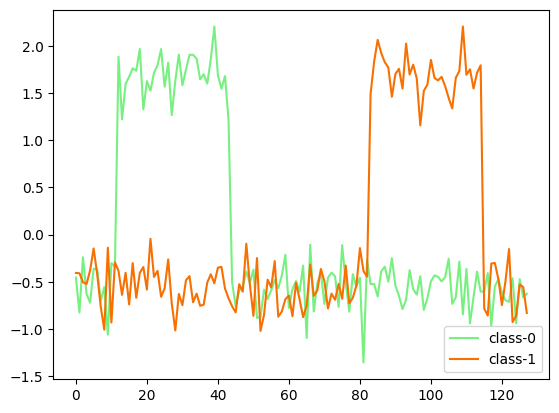

In [20]:
x_train, y_train, x_test, y_test = create_synthetic_dataset()

### Generate Synthetic dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
